In [1]:
from matplotlib import pyplot as plt
import math as m
import numpy as np

In [2]:
###David R. Rice
###Phys 604 Prof. Zhu
###Lecture 9 Homework
##Shooting Method for Legendre Polynomials

In [3]:
#Legendre Function
def fun(x,y,F):
    F[0]=y[1]
    F[1]=(2.*x*y[1]-n*(n+1)*y[0])/(1.-x*x)

In [4]:
eps= 1E-4
n=5
n_steps= 10000

h= 0.0001
count_max = 100   

In [5]:
##4th order RUnge-Kutta fixed step size
def rk4(t, y,h,Neqs):
    F  = np.zeros((Neqs),float)
    ydumb     = np.zeros((Neqs),float)
    k1 = np.zeros((Neqs),float)
    k2 = np.zeros((Neqs),float)
    k3 = np.zeros((Neqs),float)
    k4 = np.zeros((Neqs),float)
    fun(t, y, F)
    for i in range(0,Neqs):
        k1[i] = h*F[i]
        ydumb[i] = y[i] + k1[i]/2.
    fun(t + h/2., ydumb, F)
    for i in range(0,Neqs):
        k2[i] = h*F[i]
        ydumb[i] = y[i] + k2[i]/2.
    fun(t + h/2., ydumb, F)
    for i in range(0,Neqs):
        k3[i]=  h*F[i]
        ydumb[i] = y[i] + k3[i]
    fun(t + h, ydumb, F);
    for i in range(0,Neqs):
        k4[i]=h*F[i]
        y[i]=y[i]+(k1[i]+2*(k2[i]+k3[i])+k4[i])/6.0

In [6]:
def diff(yguess,h):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    y = np.zeros((2),float)
    nL = n_steps
    y[0] = 0.;                                      
    y[1] = yguess
    for ix in range(0,nL):
        x = h * ix
        rk4(x, y, h, 2)
        x1=np.append(x1,x)
        y1=np.append(y1,y[0])

    return [x1,y1]

/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


1.0
1.8749999998908091


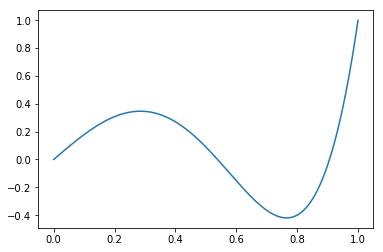

In [12]:
ymax0=3.
ymin0=1.
#print('yemax yemin',yemax[-1],yemin[-1])

for iter in range(count_max):    
    ymid0=(ymax0+ymin0)/2.
    [xmid,ymid]=diff(ymid0,h)
    
    if ymid[-1]-1>0.:
        ymax0=ymid0
        
    else:
        ymin0=ymid0


plt.plot(xmid,ymid)
print(ymid[-1])
print(ymid0)
plt.show()        
